<a href="https://colab.research.google.com/github/AKSHAY-CHOWDARY/AKSHAY-CHOWDARY/blob/main/Akshay_NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train[:, None], dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test[:, None], dtype=torch.float32)

# Model
model = nn.Sequential(nn.Linear(10, 1), nn.Sigmoid())
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Train
for _ in range(50):
    optimizer.zero_grad()
    loss = loss_fn(model(X_train), y_train)
    loss.backward()
    optimizer.step()

# Test
with torch.no_grad():  # no gradients needed during inference
    y_pred = model(X_test) > 0.5

# Convert to numpy
acc = accuracy_score(y_test.numpy(), y_pred.numpy())
print(acc)


0.832


## **Write a program to classify data from three different classes using a multi-layer neural network.**

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=500,n_features=10,n_informative=3,n_classes=3,random_state=42)

X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train = torch.tensor(X_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.long)
y_test = torch.tensor(y_test,dtype=torch.long)

model = nn.Sequential(
    nn.Linear(10,50),
    nn.ReLU(),
    nn.Linear(50,3)
)
opt = torch.optim.Adam(model.parameters(),lr=0.1)
loss_fn = nn.CrossEntropyLoss()

for _ in range(10):
  optimizer.zero_grad()
  loss = loss_fn(model(X_train),y_train)
  loss.backward()
  optimizer.step()

with torch.no_grad():
  y_pred = model(X_test).argmax(dim=1)

accuracy_score(y_test,y_pred)

0.416

# **BACKPROPAGATION**

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward propagation
        self.hidden = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = self.sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backward(self, X, y, output, learning_rate):
        # Backward propagation
        output_error = y - output
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden)

        # Update weights and biases
        self.weights2 += self.hidden.T.dot(output_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X, threshold=0.5):
        prob = self.forward(X)
        return (prob > threshold).astype(int)

# Example usage
if __name__ == "__main__":
    # XOR problem
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Create and train neural network
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    nn.train(X, y, epochs=10000, learning_rate=0.1)

    # Predictions after training
    print("\nPredictions after training:")
    for x in X:
        pred = nn.predict(np.array([x]))
        print(f"{x} -> {pred[0][0]}")


Epoch 0, Loss: 0.3473
Epoch 1000, Loss: 0.2363
Epoch 2000, Loss: 0.1677
Epoch 3000, Loss: 0.0446
Epoch 4000, Loss: 0.0147
Epoch 5000, Loss: 0.0079
Epoch 6000, Loss: 0.0052
Epoch 7000, Loss: 0.0038
Epoch 8000, Loss: 0.0030
Epoch 9000, Loss: 0.0024

Predictions after training:
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0


# **Amazon food review**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (ensure 'Reviews.csv' is in your working directory)
df = pd.read_csv('Reviews.csv')

# Keep only necessary columns and remove nulls
df = df[['Text', 'Score']].dropna()

# Remove neutral reviews (Score == 3)
df = df[df['Score'] != 3]

# Label encoding: 1 for positive (Score >= 4), 0 for negative (Score <= 2)
df['Label'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Text'], df['Label'], test_size=0.2, random_state=42, stratify=df['Label']
)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# **Write a PyTorch program to classify IMDb or Amazon reviews using an LSTM.**

In [ ]:
import os
import json
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Optional: Load Kaggle API credentials if you're using Kaggle datasets
# kaggle_dictionary = json.load(open("kaggle.json"))
# os.environ['KAGGLE_USERNAME'] = kaggle_dictionary["username"]
# os.environ['KAGGLE_KEY'] = kaggle_dictionary["key"]

# Unzip the dataset file
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
    zip_ref.extractall()

# Load the dataset
data = pd.read_csv("IMDB Dataset.csv")  # Path adjusted after unzip
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

# Split data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])

# Convert text to padded sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Sentiment prediction function
def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

# Example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")


# **Demonstrate how to install Python, PyTorch, and upload files to Google Colab**

In [ ]:
# ✅ Step 1: Check Python & PyTorch Installation
!python --version
!pip install torch torchvision torchaudio

# ✅ Step 2: Upload files in Google Colab
from google.colab import files
uploaded = files.upload()  # Choose your file from local

# ✅ Step 3: Load the uploaded file with pandas
import pandas as pd

# Replace 'your_file.csv' with the actual uploaded file name
df = pd.read_csv('your_file.csv')
df.head()

# **Classification report and confusion matrix**

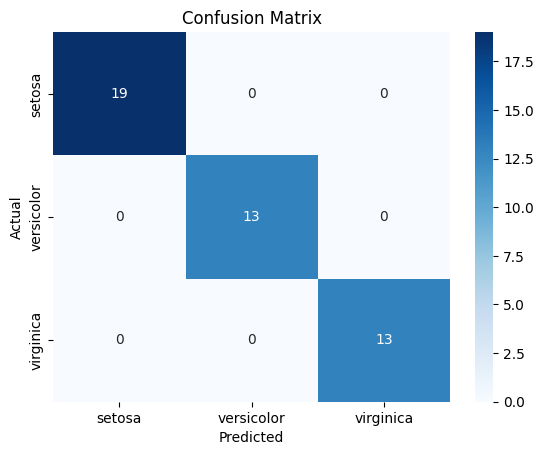

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# **program to implement an Artificial Neural network to classify MNIST dataset**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8638 - loss: 0.4862 - val_accuracy: 0.9503 - val_loss: 0.1675
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9584 - loss: 0.1414 - val_accuracy: 0.9665 - val_loss: 0.1143
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9720 - loss: 0.0922 - val_accuracy: 0.9672 - val_loss: 0.1067
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9812 - loss: 0.0642 - val_accuracy: 0.9747 - val_loss: 0.0914
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0473 - val_accuracy: 0.9732 - val_loss: 0.0909
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9894 - loss: 0.0355 - val_accuracy: 0.9730 - val_loss: 0.0882
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.9736 - val_loss: 0.0966
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9931 - loss: 0.02

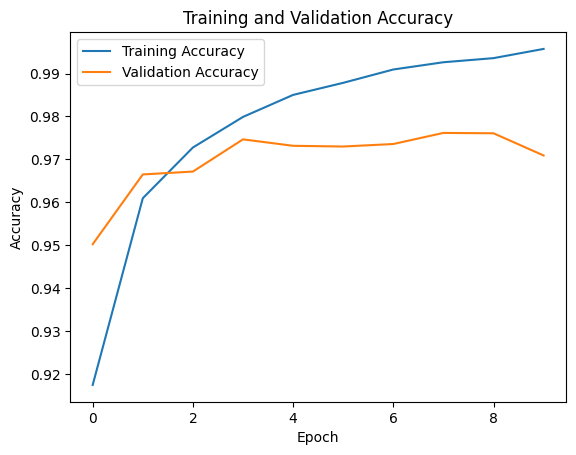

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Predicted Label: 7
True Label: 7


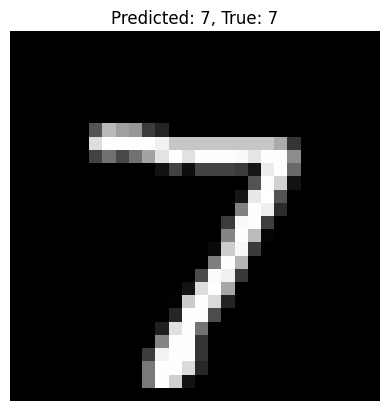

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the ANN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),          # Flatten 28x28 images to 1D array
    keras.layers.Dense(128, activation='relu'),          # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')         # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on a test image
sample_idx = 0
sample_image = X_test[sample_idx]
prediction = model.predict(np.array([sample_image]))
predicted_label = np.argmax(prediction)
print(f"\nPredicted Label: {predicted_label}")
print(f"True Label: {y_test[sample_idx]}")

# Display the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {y_test[sample_idx]}")
plt.axis('off')
plt.show()

# **Vanishing gradients in RNN**


Training Simple RNN...
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5268 - loss: 0.7024 - val_accuracy: 0.4400 - val_loss: 0.7158
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5484 - loss: 0.6920 - val_accuracy: 0.4400 - val_loss: 0.7099
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5802 - loss: 0.6817 - val_accuracy: 0.4550 - val_loss: 0.7145
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5953 - loss: 0.6791 - val_accuracy: 0.4200 - val_loss: 0.7274
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5568 - loss: 0.6802 - val_accuracy: 0.4500 - val_loss: 0.7257
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5742 - loss: 0.6756 - val_accuracy: 0.4300 - val_loss: 0.7189
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5955 - loss: 0.6671 - val_accuracy: 0.4400 - val_loss: 0.7212
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5997 - loss: 0.6683 - 

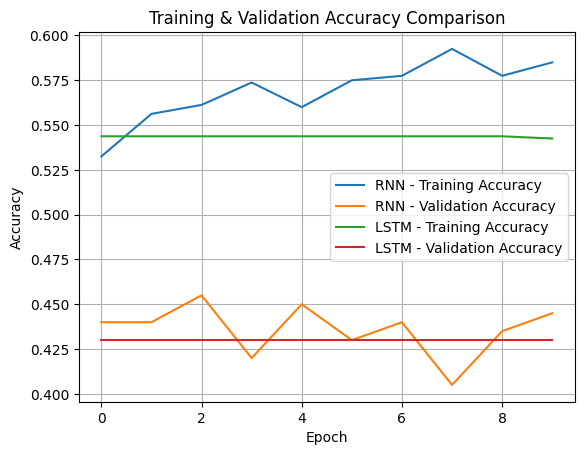

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
import matplotlib.pyplot as plt

# 1. Generate synthetic sequence data with long-term dependency
def generate_sequence_data(samples=1000, timesteps=100):
    X = np.random.randint(0, 2, size=(samples, timesteps, 1))
    # Long-range dependency: XOR of first and last time step
    y = np.logical_xor(X[:, 0, 0], X[:, -1, 0]).astype(int).reshape(-1, 1)
    return X, y

# Generate training and test data
X_train, y_train = generate_sequence_data()
X_test, y_test = generate_sequence_data()

# 2. Build a Simple RNN model
rnn_model = Sequential([
    SimpleRNN(32, input_shape=(100, 1)),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Build an LSTM model
lstm_model = Sequential([
    LSTM(32, input_shape=(100, 1)),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train both models
print("\nTraining Simple RNN...")
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

print("\nTraining LSTM...")
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

# 5. Evaluate on test data
print("\nEvaluating Simple RNN on test data:")
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(X_test, y_test)

print("\nEvaluating LSTM on test data:")
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test, y_test)

# 6. Plot training accuracy
plt.plot(rnn_history.history['accuracy'], label='RNN - Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN - Validation Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM - Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM - Validation Accuracy')
plt.title('Training & Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# **Modify your CNN to include batch normalization and dropout**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPooling2D

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Include input shape for first layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting

    Dense(10, activation='softmax')  # Output layer for 10 classes (like MNIST)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

# **Modify your CNN architecture to include residual connections**

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Add, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Input layer
inputs = Input(shape=(32, 32, 3))

# Initial convolution
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Residual block
residual = Conv2D(64, (1, 1), padding='same')(x)
residual = BatchNormalization()(residual)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Add()([x, residual])
x = MaxPooling2D((2, 2))(x)

# Fully connected layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

# Model compilation
model = Model(inputs, outputs)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Model evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


# **Perform transfer learning for emotion detection using a pretrained CNN**

In [ ]:
# Install required packages
# pip install torch torchvision matplotlib scikit-learn

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Data Preprocessing and Loading
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Load Pretrained Model & Modify Last Layer
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # CIFAR-10 has 10 classes
model = model.to(device)

# 3. Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# 4. Training
train_loss_history = []
test_accuracy_history = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_loss_history.append(train_loss)

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_accuracy_history.append(accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {accuracy:.2f}%")

# 5. Plot Loss & Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# 6. Confusion Matrix
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs.data, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
ConfusionMatrixDisplay(cm, display_labels=classes).plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 7. Visualize Predictions
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))
images = images.to(device)
outputs = model(images[:4])
_, predicted = torch.max(outputs.data, 1)
print("Predicted:", ' '.join(f'{classes[predicted[j]]}' for j in range(4)))
print("Actual:   ", ' '.join(f'{classes[labels[j]]}' for j in range(4)))

100%|██████████| 170M/170M [00:03<00:00, 55.3MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 91.3MB/s]


KeyboardInterrupt: 

# **SAVE AND LOAD MODEL**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple model
class SimpleNet(nn.Module):
    def __init__(self):  # FIXED: changed from _init_ to __init__
        super(SimpleNet, self).__init__()  # FIXED: changed from _init_ to __init__
        self.fc = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.fc(x)

# Create model, loss, optimizer
model = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dummy training loop (1 batch)
inputs = torch.randn(64, 784)
labels = torch.randint(0, 10, (64,))
outputs = model(inputs)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()

# ✅ Save model weights
torch.save(model.state_dict(), 'simplenet_weights.pth')
print("Model weights saved!")

# 🔄 Load model weights into new model
new_model = SimpleNet()
new_model.load_state_dict(torch.load('simplenet_weights.pth'))
new_model.eval()
print("Model weights loaded!")


# **Mobilenet**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

# 1. Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet mean and std
])

# 2. Load dataset (adjust paths as per your dataset)
train_dataset = datasets.ImageFolder('intel_data/seg_train/seg_train', transform=transform)
val_dataset = datasets.ImageFolder('intel_data/seg_test/seg_test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# 3. Load pre-trained MobileNetV2
model = models.mobilenet_v2(pretrained=True)
for param in model.features.parameters():
    param.requires_grad = False  # Freeze base layers

# 4. Replace the classifier
num_classes = len(train_dataset.classes)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# 5. Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(3):
    model.train()
    running_loss = 0.0
    correct = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = correct / len(train_dataset)
    print(f"Epoch {epoch+1} - Loss: {running_loss:.4f}, Train Accuracy: {train_acc:.4f}")

# 7. Fine-tuning: unfreeze base layers
for param in model.features.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Fine-tune for 3 more epochs
for epoch in range(3):
    model.train()
    running_loss = 0.0
    correct = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = correct / len(train_dataset)
    print(f"Fine-tune Epoch {epoch+1} - Loss: {running_loss:.4f}, Train Accuracy: {train_acc:.4f}")


# **UNI AND BI LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load and preprocess data
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Unidirectional LSTM
model_uni = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid')
])
model_uni.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_uni.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

# Bidirectional LSTM
model_bi = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dense(1, activation='sigmoid')
])
model_bi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bi.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

# Evaluation
loss_uni, acc_uni = model_uni.evaluate(x_test, y_test)
loss_bi, acc_bi = model_bi.evaluate(x_test, y_test)
print(f"Unidirectional LSTM Accuracy: {acc_uni*100:.2f}%")
print(f"Bidirectional LSTM Accuracy: {acc_bi*100:.2f}%")
